In [24]:
#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import os

import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import style
from PIL import Image
import random as rn
from matplotlib import font_manager, rc


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

%matplotlib inline  

In [12]:
def get_images(directory): # './mush_images/'
    Images = []
    Labels = []
    label = 0

    #for labels in os.listdir(directory):
    #    if labels == ''

    class_names = os.listdir(directory)
    class_names_label = {class_name:i for i, class_name in enumerate(class_names)} # {'갈색먹물버섯': 0, '개암버섯': 1, '검은비늘버섯': 2, ..., '흰갈대버섯': 54}
    
    

SyntaxError: invalid syntax (<ipython-input-12-ce6bd63272d5>, line 9)

In [20]:
#class_names = os.listdir('./mush_images/')
#class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
#print(class_names_label)
print(os.listdir('./mush_images/'))

['갈색먹물버섯', '개암버섯', '검은비늘버섯', '곰보버섯', '광대버섯', '구름버섯', '기와', '까치버섯', '꽃송이버섯', '꾀꼬리버섯', '난버섯', '노란다발버섯', '노루궁뎅이버섯', '녹변나팔버섯', '느타리버섯', '능이버섯', '다발방패버섯', '다색벚꽃버섯', '달걀버섯', '두엄먹물버섯', '마귀곰보버섯', '마귀광대버섯', '만가닥버섯', '말굽버섯', '말불버섯', '말징버섯', '목이', '민자주방망이버섯', '밤버섯', '붉은말뚝버섯', '비늘버섯', '뽕나무', '삿갓외대버섯', '상황버섯', '새송이버섯', '석이버섯', '송이버섯', '싸리버섯', '양송이', '연기색만가닥버섯', '영지버섯', '외대덧버섯', '운지', '은이', '잎새버섯', '절구버섯아재비', '젖비단그물', '주름버섯', '치마버섯', '큰갓', '큰눈물버섯', '큰주머니광대버섯', '표고버섯', '화경버섯', '흰갈대버섯']


In [34]:
X = []
Z = []
IMG_SIZE = 150

In [35]:
def assign_label(img,flower_type):
    return flower_type

def make_train_data(mushroom_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = mushroom_type # ? assign_label(img,flower_type) ??
        path = os.path.join(DIR, img) # DIR + '/' + img 
        #print(path)
        ff = np.fromfile(path, np.uint8)
        img = cv2.imdecode(ff, cv2.IMREAD_COLOR)
        #img = cv2.imread(path, cv2.IMREAD_COLOR) # 한글 경로 문제로 사용 불가, 위 두줄로 대체
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [36]:
mush_types = os.listdir('./mush_images')

for mush_type in mush_types:
    mush_dir = './mush_images/' + mush_type
    #print(mush_dir)
    make_train_data(mush_type, mush_dir)

print(len(X))

100%|██████████| 182/182 [00:00<00:00, 347.45it/s]8936



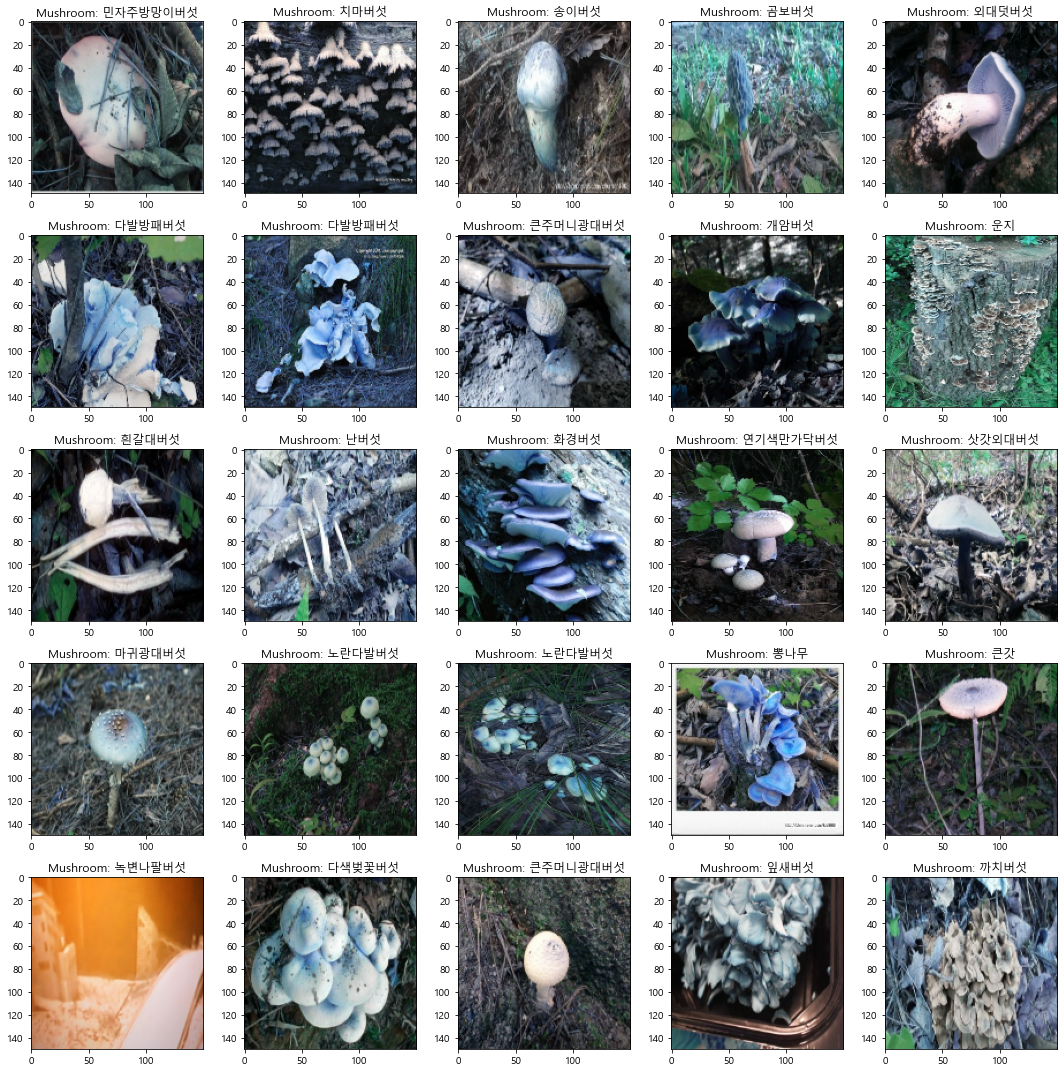

In [23]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

sub_X = 5
sub_Y = 5
fig,ax=plt.subplots(sub_Y,sub_X)
fig.set_size_inches(15,15)
for i in range(sub_Y):
    for j in range (sub_X):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Mushroom: '+ Z[l])
        
plt.tight_layout()

In [40]:
le = LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y,len(mush_types)) # One-hot Encoding
print(Y) 

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [41]:
X = np.array(X)
X = X/255
#print(X)

[[[[0.94509804 0.94901961 0.96470588]
   [0.98823529 0.99215686 0.98039216]
   [0.99607843 0.99215686 0.99215686]
   ...
   [0.98823529 0.98039216 1.        ]
   [1.         0.99607843 1.        ]
   [0.96862745 0.96862745 0.96862745]]

  [[0.96078431 0.96470588 0.97647059]
   [1.         1.         0.98823529]
   [0.98039216 0.97647059 0.98039216]
   ...
   [0.99607843 0.99215686 1.        ]
   [0.99607843 0.99215686 1.        ]
   [0.96862745 0.96862745 0.96862745]]

  [[0.95686275 0.96078431 0.97254902]
   [0.98431373 0.99607843 0.98431373]
   [0.95294118 0.98039216 0.98039216]
   ...
   [0.96470588 0.97254902 0.98039216]
   [0.99215686 0.99215686 0.99607843]
   [0.96470588 0.96470588 0.96470588]]

  ...

  [[0.96862745 0.96862745 0.96470588]
   [0.98431373 0.99215686 0.99215686]
   [0.94117647 0.94901961 0.94901961]
   ...
   [0.91764706 0.94509804 0.96078431]
   [0.99215686 1.         0.99215686]
   [0.96470588 0.96862745 0.96078431]]

  [[0.97254902 0.97254902 0.96862745]
   [0.9

In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [44]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [51]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(len(mush_types), activation = "softmax"))

In [46]:
batch_size=128
epochs=100

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [47]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [52]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [53]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 96)       

In [54]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
48/52 [==========================>...] - ETA: 21s - loss: 3.9984 - accuracy: 0.0275

KeyboardInterrupt: 

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()